## Processing Emotion Videos for **Résident2**

###  Setting up the Detector

We'll begin by creating a new `Detector` instance just like the previous tutorial and using the defaults:

In [1]:
from feat import Detector

detector = Detector()

detector

INFO:root:Loading Face model: retinaface
INFO:root:Loading Facial Landmark model: mobilefacenet
INFO:root:Loading facepose model: img2pose
INFO:root:Loading AU model: xgb
INFO:root:Loading emotion model: resmasknet
INFO:root:Loading Identity model: facenet


feat.detector.Detector(face_model=retinaface, landmark_model=mobilefacenet, au_model=xgb, emotion_model=resmasknet, facepose_model=img2pose, identity_model=facenet)

In [2]:
from IPython.core.display import Video, display
import os
import cv2


base_path = "/home/maram/Downloads/PrendreLaParole/newFPS/resident2"

## 1 Processing the 1st video: Happiness

### 1.1 Load the video

In [3]:

emotionHappiness_dir = os.path.join(base_path, "happiness")

for filename in os.listdir(emotionHappiness_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidHappiness = os.path.join(emotionHappiness_dir, filename)
        print(f"\n--- happiness ---")
        video = cv2.VideoCapture(path_to_vidHappiness)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidHappiness, embed=False))



--- happiness ---
FPS: 25.0


### 1.2 Process the video

In [4]:
video_predictionHappiness = detector.detect_video(
    path_to_vidHappiness, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/79 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 66, 66]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 66, 66]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  1%|▏         | 1/79 [00:01<02:02,  1.58s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:de

### Save as csv

In [5]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidHappiness), "pyFeat-happiness.csv")
video_predictionHappiness.aus.to_csv(csv_path)

### 1.3 Visualizing predictions

In [6]:
video_predictionHappiness.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.267678,0.089101,0.222227,0.235084,0.500455,1.0,0.622025,0.004691,1.0,0.254310,0.655766,0.191881,0.374312,1.0,0.358772,0.067489,0.959398,0.371676,0.067145,0.859861
1,0.340157,0.160907,0.374401,0.237528,0.804928,1.0,0.616881,0.011180,1.0,0.836469,0.442318,0.172656,0.295072,1.0,0.279693,0.051776,0.993535,0.383377,0.028894,0.468805
2,0.371524,0.230591,0.390200,0.223323,0.895599,1.0,0.692092,0.893226,1.0,0.822448,0.522138,0.097144,0.252393,1.0,0.306278,0.026598,0.999789,0.560079,0.045438,0.793234
3,0.406610,0.172838,0.457064,0.223323,0.914347,1.0,0.679050,0.860524,1.0,0.856235,0.471669,0.121957,0.283412,1.0,0.237549,0.031287,0.999933,0.569158,0.059179,0.743335
4,0.329282,0.334191,0.411254,0.223323,0.864509,1.0,0.681175,0.180044,1.0,0.851949,0.492110,0.171074,0.381613,1.0,0.191095,0.043144,0.999900,0.651704,0.032427,0.685638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.421207,0.356654,0.267404,0.230336,0.872887,0.0,0.584693,0.270725,1.0,0.853453,0.600485,0.091882,0.250222,1.0,0.254582,0.053068,0.999894,0.557608,0.133000,0.380713
75,0.315722,0.237913,0.350754,0.230190,0.875638,1.0,0.650318,0.631898,1.0,0.739635,0.582425,0.081226,0.302579,1.0,0.293986,0.053138,0.999608,0.331633,0.106147,0.340868
76,0.362903,0.250713,0.236562,0.232146,0.932388,1.0,0.642945,0.554927,0.0,0.914149,0.651117,0.030105,0.271371,1.0,0.216380,0.052357,0.999904,0.321815,0.096567,0.269772


In [7]:
average_aus = video_predictionHappiness.aus.mean()

# Display the result
print("Average AU intensities across all frames (Happiness) :\n")
print(average_aus)

Average AU intensities across all frames (Happiness) :

AU01    0.353811
AU02    0.303162
AU04    0.389413
AU05    0.250384
AU06    0.891539
AU07    0.936709
AU09    0.605465
AU10    0.412016
AU11    0.949367
AU12    0.899909
AU14    0.527170
AU15    0.088016
AU17    0.229028
AU20    1.000000
AU23    0.210463
AU24    0.035711
AU25    0.998949
AU26    0.526646
AU28    0.063128
AU43    0.336052
dtype: float32


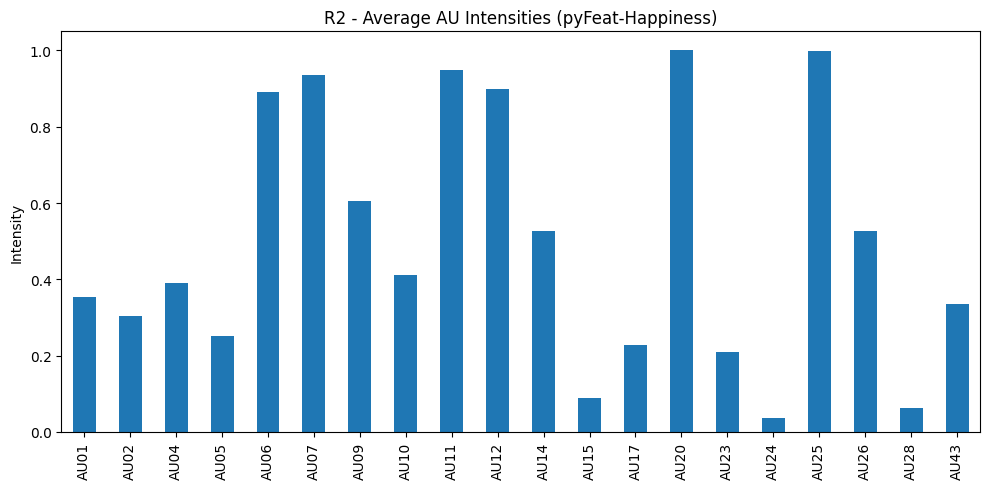

In [8]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R2 - Average AU Intensities (pyFeat-Happiness)")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident2/happiness/happiness_pyFeat_au_plot.png")
plt.show()

[<Figure size 1500x700 with 3 Axes>]

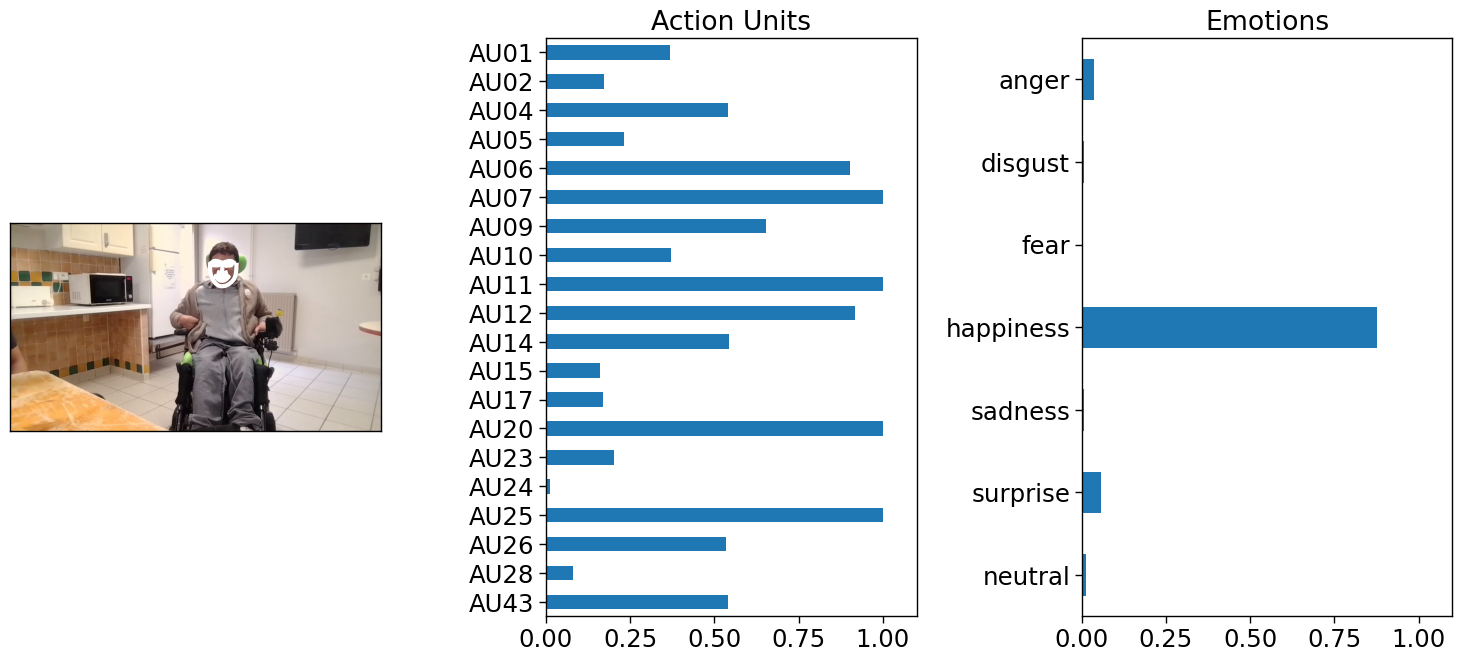

In [10]:
video_predictionHappiness.query("frame == 24").plot_detections(
    faceboxes=False, add_titles=False
)

In [11]:
video_predictionHappiness.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.399791,0.066209,0.032927,0.413806,0.010060,0.023351,0.053855
1,0.421497,0.043782,0.050458,0.393107,0.005204,0.070504,0.015449
2,0.021517,0.034875,0.003768,0.904010,0.002281,0.020579,0.012970
3,0.017731,0.015625,0.003320,0.909327,0.003073,0.033314,0.017610
4,0.005282,0.011231,0.002072,0.958311,0.001726,0.013408,0.007970


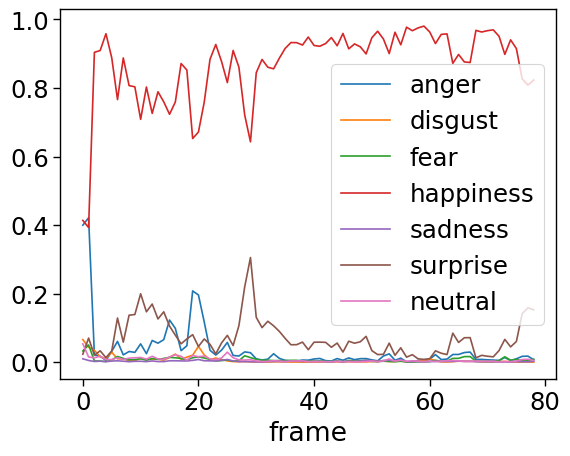

In [13]:
axes = video_predictionHappiness.emotions.plot()

## 2. Processing the 2nd video: Fear

### 2.1 Load the video

In [14]:
emotionFear_dir = os.path.join(base_path, "fear")

for filename in os.listdir(emotionFear_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidFear = os.path.join(emotionFear_dir, filename)
        print(f"\n--- fear ---")
        video = cv2.VideoCapture(path_to_vidFear)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidFear, embed=False))



--- fear ---
FPS: 25.0


### 2.2 Process the video

In [15]:
video_predictionFear = detector.detect_video(
    path_to_vidFear, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/209 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 60, 60]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 60, 60]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  0%|          | 1/209 [00:01<04:16,  1.23s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:

### save as csv

In [16]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidFear), "pyFeat-fear.csv")
video_predictionFear.aus.to_csv(csv_path)

### 1.3 Visualizing predictions

In [17]:
video_predictionFear.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.450695,0.116478,0.484262,0.282900,0.133341,1.0,0.612945,0.012501,0.0,0.052957,0.360384,0.269391,0.475708,0.0,0.519968,0.675154,0.446686,0.375895,0.288028,0.436953
1,0.323722,0.129945,0.616201,0.280676,0.188213,0.0,0.760646,0.010800,1.0,0.069721,0.508451,0.208337,0.435121,0.0,0.636410,0.755512,0.388227,0.616210,0.154226,0.445130
2,0.311958,0.169804,0.359088,0.260769,0.176026,1.0,0.632624,0.000069,1.0,0.071348,0.276064,0.177996,0.477519,0.0,0.548611,0.702695,0.327193,0.303456,0.499460,0.288826
3,0.328071,0.135538,0.411676,0.255727,0.169300,0.0,0.589006,0.001243,1.0,0.074476,0.382582,0.117368,0.454210,0.0,0.486662,0.625913,0.256973,0.278073,0.743025,0.149838
4,0.269029,0.121523,0.660127,0.355230,0.176472,0.0,0.150769,0.010346,1.0,0.067591,0.301374,0.103088,0.425555,0.0,0.445721,0.737691,0.091608,0.264651,0.801813,0.057932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.366552,0.115513,0.178380,0.440320,0.166563,0.0,0.160406,0.000742,1.0,0.021996,0.632599,0.217093,0.473292,1.0,0.301545,0.602344,0.922835,0.258462,0.046802,0.035366
205,0.280823,0.216212,0.104080,0.615426,0.125084,0.0,0.122810,0.001380,0.0,0.033138,0.431025,0.217237,0.486828,1.0,0.438675,0.736375,0.211901,0.310412,0.169973,0.029315
206,0.330392,0.160037,0.165224,0.579562,0.107789,0.0,0.119094,0.000330,1.0,0.024671,0.296643,0.159004,0.476658,0.0,0.353235,0.498292,0.722636,0.217605,0.215259,0.039644


In [18]:
average_aus = video_predictionFear.aus.mean()

# Display the result
print("Average AU intensities across all frames (Fear) :\n")
print(average_aus)

Average AU intensities across all frames (Fear) :

AU01    0.315088
AU02    0.211604
AU04    0.489467
AU05    0.297462
AU06    0.396778
AU07    0.234146
AU09    0.514174
AU10    0.116363
AU11    0.331707
AU12    0.354898
AU14    0.565360
AU15    0.300680
AU17    0.509836
AU20    0.668293
AU23    0.526619
AU24    0.569165
AU25    0.855639
AU26    0.362297
AU28    0.270490
AU43    0.208021
dtype: float32


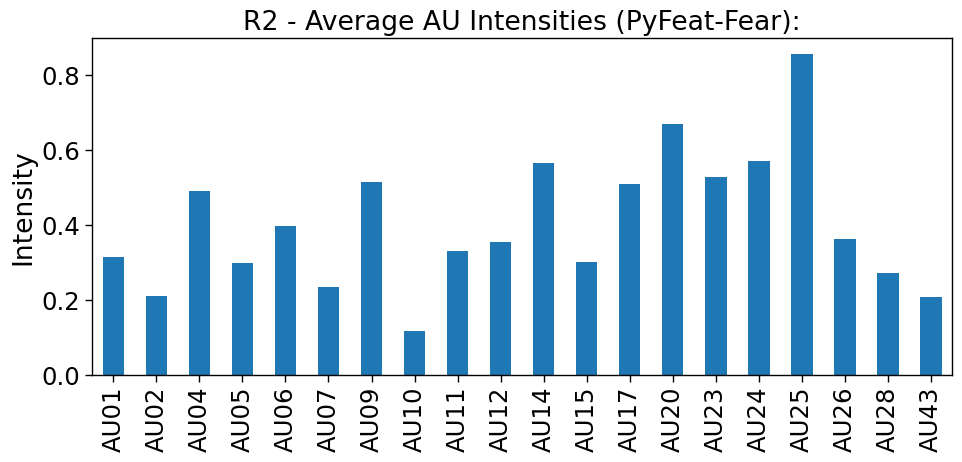

In [19]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R2 - Average AU Intensities (PyFeat-Fear):")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident2/fear/fear_pyFeat_au_plot.png")
plt.show()

In [20]:
video_predictionFear.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.718584,0.011591,0.032030,0.005570,0.010478,0.110266,0.111481
1,0.917331,0.026736,0.017616,0.004525,0.003053,0.009684,0.021055
2,0.883510,0.001311,0.008467,0.002218,0.002132,0.028868,0.073495
3,0.865398,0.003553,0.009701,0.003082,0.004587,0.035443,0.078236
4,0.518633,0.004960,0.017019,0.006380,0.006251,0.175962,0.270795


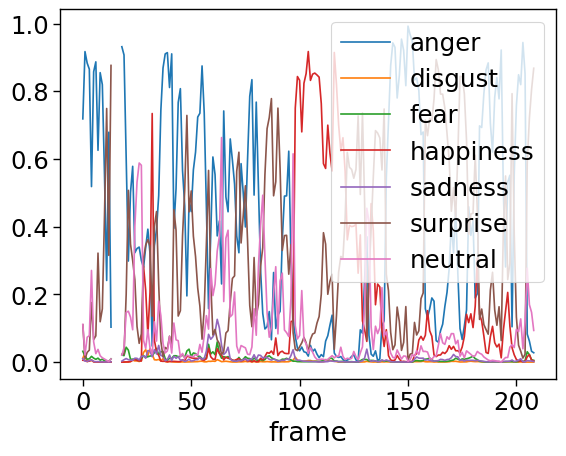

In [21]:
axes = video_predictionFear.emotions.plot()

## 3. Processing the 3rd video: Sadness

### 3.1 Load the video

In [22]:
emotionSadness_dir = os.path.join(base_path, "sadness")

for filename in os.listdir(emotionSadness_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidSadness = os.path.join(emotionSadness_dir, filename)
        print(f"\n--- sadness ---")
        video = cv2.VideoCapture(path_to_vidSadness)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidSadness, embed=False))



--- sadness ---
FPS: 25.0


### 3.2 Process the video

In [23]:
video_predictionSadness = detector.detect_video(
    path_to_vidSadness, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/61 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 62, 62]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 62, 62]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  2%|▏         | 1/61 [00:01<01:14,  1.25s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:de

### save as csv

In [24]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidSadness), "pyFeat-sadness.csv")
video_predictionSadness.aus.to_csv(csv_path)

### 3.3 Visualizing results

In [25]:
video_predictionSadness.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.367019,0.182531,0.293097,0.312338,0.232304,0.0,0.748530,0.010026,0.0,0.085653,0.581756,0.262050,0.525932,0.0,0.580364,0.753756,0.128960,0.072505,0.189611,0.127035
1,0.389029,0.295665,0.356858,0.299076,0.510045,0.0,0.642789,0.050731,0.0,0.222411,0.559734,0.570889,0.607077,1.0,0.537947,0.795823,0.745234,0.055723,0.129560,0.112239
2,0.435455,0.230674,0.552047,0.266480,0.642218,0.0,0.712374,0.219407,0.0,0.497631,0.610100,0.422519,0.586999,0.0,0.695040,0.610256,0.193558,0.115818,0.206669,0.339348
3,0.420012,0.111496,0.340885,0.341509,0.171613,0.0,0.485199,0.034283,0.0,0.070664,0.359113,0.261140,0.525561,0.0,0.569837,0.412580,0.602112,0.094500,0.177544,0.549497
4,0.689314,0.278553,0.677724,0.314481,0.358227,0.0,0.685452,0.207467,0.0,0.242923,0.678783,0.759199,0.632517,0.0,0.607988,0.824125,0.019436,0.138310,0.708434,0.197464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,0.536729,0.354390,0.444370,0.404228,0.335965,0.0,0.246311,0.609907,0.0,0.099406,0.689513,0.202158,0.478263,1.0,0.611710,0.755166,0.097405,0.111672,0.135529,0.059753


In [26]:
average_aus = video_predictionSadness.aus.mean()

# Display the result
print("Average AU intensities across all frames (sadness):\n")
print(average_aus)

Average AU intensities across all frames (sadness):

AU01    0.441440
AU02    0.304232
AU04    0.613501
AU05    0.292213
AU06    0.449815
AU07    0.052632
AU09    0.598557
AU10    0.137123
AU11    0.263158
AU12    0.358866
AU14    0.688438
AU15    0.411365
AU17    0.588255
AU20    0.315789
AU23    0.608983
AU24    0.730415
AU25    0.097069
AU26    0.108225
AU28    0.458578
AU43    0.321378
dtype: float32


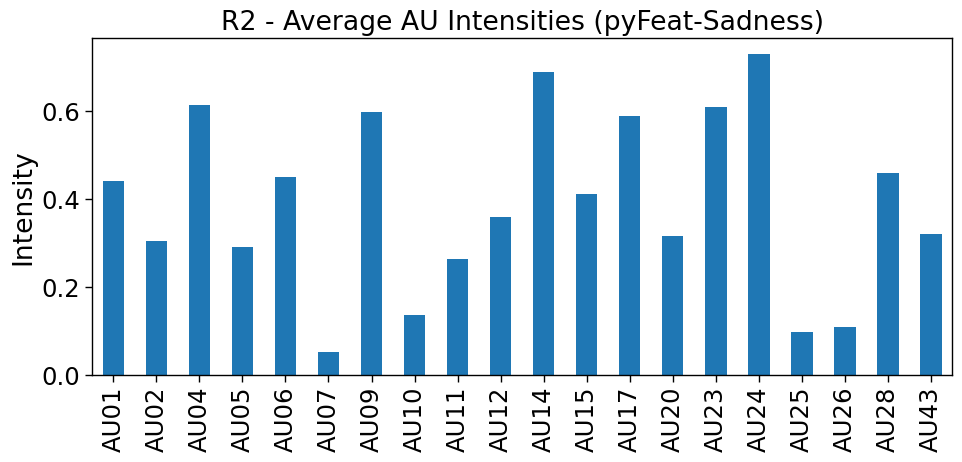

In [27]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R2 - Average AU Intensities (pyFeat-Sadness)")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident2/sadness/sadness_pyFeat_au_plot.png")
plt.show()

In [28]:
video_predictionSadness.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.080807,0.002818,0.028096,0.085193,0.031894,0.667620,0.103572
1,0.382332,0.002381,0.027182,0.056051,0.034502,0.347000,0.150552
2,0.764518,0.002894,0.013143,0.052092,0.011589,0.088504,0.067260
3,0.801816,0.001829,0.006612,0.064603,0.006151,0.080069,0.038919
4,0.591363,0.005382,0.005599,0.141453,0.058361,0.056355,0.141486


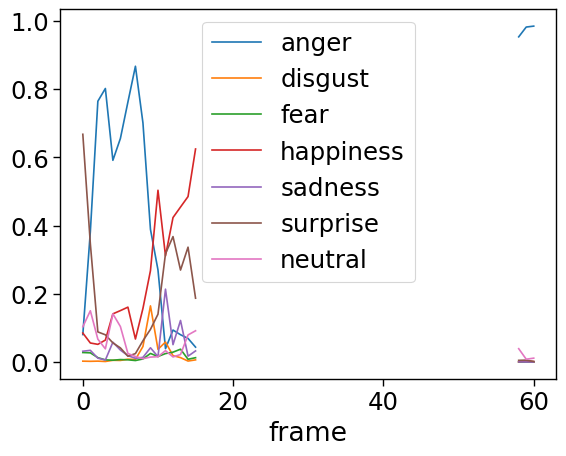

In [29]:
axes = video_predictionSadness.emotions.plot()

## 4. Processing the 4th video: Disgust

### 4.1 Load the video

In [30]:
emotionDisgust_dir = os.path.join(base_path, "disgust")

for filename in os.listdir(emotionDisgust_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidDisgust = os.path.join(emotionDisgust_dir, filename)
        print(f"\n--- disgust ---")
        video = cv2.VideoCapture(path_to_vidDisgust)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidDisgust, embed=False))



--- disgust ---
FPS: 25.0


### 4.2 Process the video

In [31]:
video_predictionDisgust = detector.detect_video(
    path_to_vidDisgust, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/46 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 64, 64]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 64, 64]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  2%|▏         | 1/46 [00:01<01:03,  1.40s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:de

### Save as csv

In [32]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidDisgust), "pyFeat-disgust.csv")
video_predictionDisgust.aus.to_csv(csv_path)

### 3.3 Visualizing results

In [33]:
video_predictionDisgust.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.285150,0.303346,0.586863,0.258374,0.303914,1.0,0.598948,0.026111,1.0,0.243708,0.249680,0.154678,0.224281,1.0,0.345492,0.022107,0.999714,0.794673,0.201622,0.784555
1,0.296164,0.252691,0.621205,0.257394,0.293887,0.0,0.595670,0.006997,1.0,0.160045,0.255730,0.053688,0.208473,1.0,0.350775,0.037542,0.998417,0.752501,0.297193,0.768321
2,0.258162,0.169416,0.431239,0.213575,0.354163,1.0,0.524481,0.016107,1.0,0.172267,0.230920,0.170929,0.183153,1.0,0.221856,0.011340,0.999629,0.718913,0.098738,0.880383
3,0.247664,0.180314,0.444082,0.217011,0.298991,1.0,0.656811,0.232613,1.0,0.160140,0.203347,0.257889,0.253521,1.0,0.160779,0.027106,0.999868,0.812496,0.077849,0.884049
4,0.223225,0.141777,0.519959,0.217927,0.347526,1.0,0.598107,0.002735,1.0,0.181449,0.164750,0.096863,0.153220,1.0,0.305730,0.008309,0.999773,0.744031,0.130845,0.913851
5,0.227645,0.273226,0.556077,0.217946,0.356845,1.0,0.698822,0.037713,1.0,0.173734,0.176492,0.173752,0.161081,1.0,0.280573,0.008901,0.999646,0.782815,0.094829,0.901165
6,0.238613,0.164418,0.329968,0.232017,0.375725,0.0,0.774709,0.293647,1.0,0.166841,0.187259,0.280466,0.258811,1.0,0.256241,0.022820,0.999749,0.857923,0.198173,0.879193
7,0.249330,0.280158,0.492129,0.233647,0.401423,1.0,0.709250,0.444470,0.0,0.309220,0.148514,0.237308,0.284432,1.0,0.255083,0.016282,0.997594,0.790775,0.214799,0.820565
8,0.274723,0.285423,0.304865,0.233647,0.399362,1.0,0.687670,0.086839,0.0,0.362975,0.178319,0.333382,0.269075,1.0,0.269225,0.031189,0.999453,0.730786,0.177250,0.842320


In [34]:
average_aus = video_predictionDisgust.aus.mean()

# Display the result
print("Average AU intensities across all frames (Dsigust):\n")
print(average_aus)

Average AU intensities across all frames (Dsigust):

AU01    0.314861
AU02    0.246762
AU04    0.329420
AU05    0.255204
AU06    0.592295
AU07    0.739130
AU09    0.574853
AU10    0.371272
AU11    0.521739
AU12    0.466506
AU14    0.328605
AU15    0.163835
AU17    0.198456
AU20    1.000000
AU23    0.281358
AU24    0.017872
AU25    0.999547
AU26    0.749274
AU28    0.113072
AU43    0.686331
dtype: float32


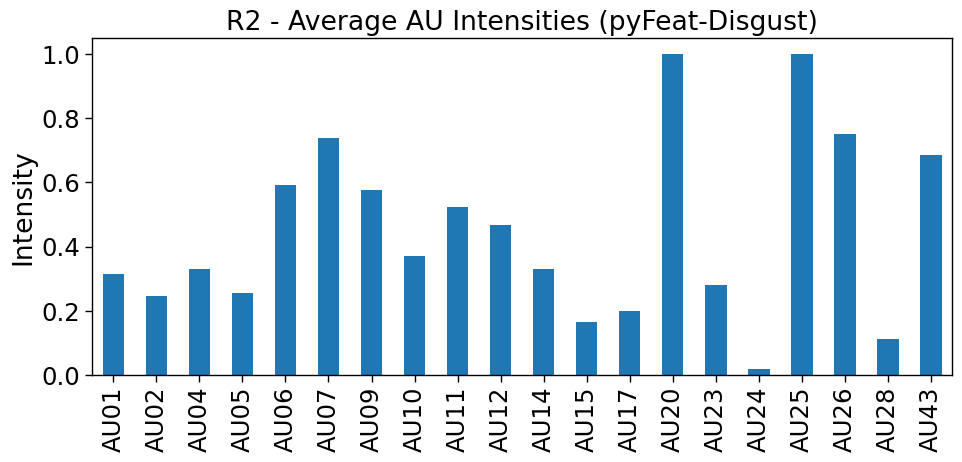

In [35]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R2 - Average AU Intensities (pyFeat-Disgust)")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident2/disgust/disgust_pyFeat_au_plot.png")

plt.show()

In [36]:
video_predictionDisgust.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.524741,0.042489,0.015402,0.074729,0.019117,0.129257,0.194265
1,0.483499,0.051621,0.022418,0.164939,0.010624,0.146161,0.120738
2,0.918581,0.021576,0.011125,0.011758,0.004182,0.021385,0.011392
3,0.852138,0.101827,0.009018,0.006918,0.004100,0.007039,0.018960
4,0.451673,0.537140,0.003847,0.001335,0.001320,0.001266,0.003419


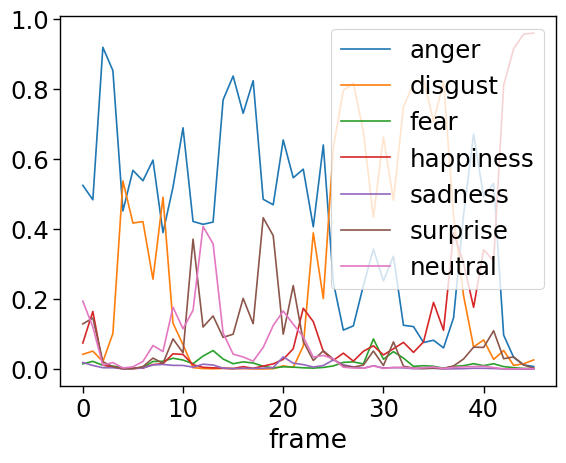

In [37]:
axes = video_predictionDisgust.emotions.plot()

## 5. Processing the 5th video: Surprise

### 5.1 Load th video

In [38]:
emotionSurprise_dir = os.path.join(base_path, "surprise")

for filename in os.listdir(emotionSurprise_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidSurprise = os.path.join(emotionSurprise_dir, filename)
        print(f"\n--- surprise ---")
        video = cv2.VideoCapture(path_to_vidSurprise)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidSurprise, embed=False))


--- surprise ---
FPS: 25.0


### 5.2 Process the video

In [39]:
video_predictionSurprise = detector.detect_video(
    path_to_vidSurprise, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/101 [00:00<?, ?it/s]

INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 64, 64]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 64, 64]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  1%|          | 1/101 [00:01<02:16,  1.36s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCAL

### save as csv

In [40]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidSurprise), "pyFeat-surprise.csv")
video_predictionSurprise.aus.to_csv(csv_path)

### 5.3 Visualizing results

In [41]:
video_predictionSurprise.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.422809,0.365966,0.119314,0.510708,0.157114,0.0,0.145533,0.146048,0.0,0.142408,0.232225,0.158611,0.486767,0.0,0.442336,0.554615,0.345879,0.088072,0.033355,0.041849
1,0.406904,0.337050,0.139461,0.515876,0.154370,0.0,0.141755,0.012838,0.0,0.148220,0.250603,0.312625,0.507109,0.0,0.473992,0.529351,0.544207,0.074355,0.042788,0.027593
2,0.407642,0.203692,0.303662,0.394581,0.218197,0.0,0.134057,0.007105,1.0,0.145025,0.186350,0.121169,0.527176,0.0,0.436142,0.510911,0.070285,0.062869,0.053876,0.041095
3,0.639755,0.368904,0.166582,0.474301,0.198484,0.0,0.166928,0.087385,0.0,0.151940,0.260148,0.325424,0.541006,0.0,0.545326,0.537537,0.298276,0.084464,0.076499,0.095705
4,0.528240,0.204566,0.445241,0.410664,0.199511,0.0,0.206248,0.232223,0.0,0.101378,0.181162,0.606776,0.454899,0.0,0.539314,0.562402,0.378453,0.133357,0.279097,0.055264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.447622,0.233576,0.242961,0.337469,0.288987,1.0,0.532581,0.318393,1.0,0.417091,0.445623,0.419093,0.382879,0.0,0.655024,0.615364,0.924227,0.122422,0.132734,0.188365
97,0.363428,0.146774,0.327078,0.347885,0.360617,0.0,0.514603,0.715691,0.0,0.533705,0.372356,0.540656,0.387551,0.0,0.590869,0.530414,0.714748,0.188552,0.175850,0.148250
98,0.329393,0.180749,0.359985,0.341226,0.411370,0.0,0.529639,0.792318,1.0,0.449491,0.416115,0.549639,0.378936,0.0,0.530460,0.472300,0.967729,0.187275,0.099748,0.202606


In [42]:
average_aus = video_predictionSurprise.aus.mean()

# Display the result
print("Average AU intensities across all frames (Surprise):\n")
print(average_aus)

Average AU intensities across all frames (Surprise):

AU01    0.382346
AU02    0.244174
AU04    0.254804
AU05    0.444127
AU06    0.215572
AU07    0.049505
AU09    0.256651
AU10    0.187700
AU11    0.504951
AU12    0.243090
AU14    0.370722
AU15    0.300018
AU17    0.489965
AU20    0.000000
AU23    0.589460
AU24    0.525866
AU25    0.498595
AU26    0.163419
AU28    0.171810
AU43    0.088771
dtype: float32


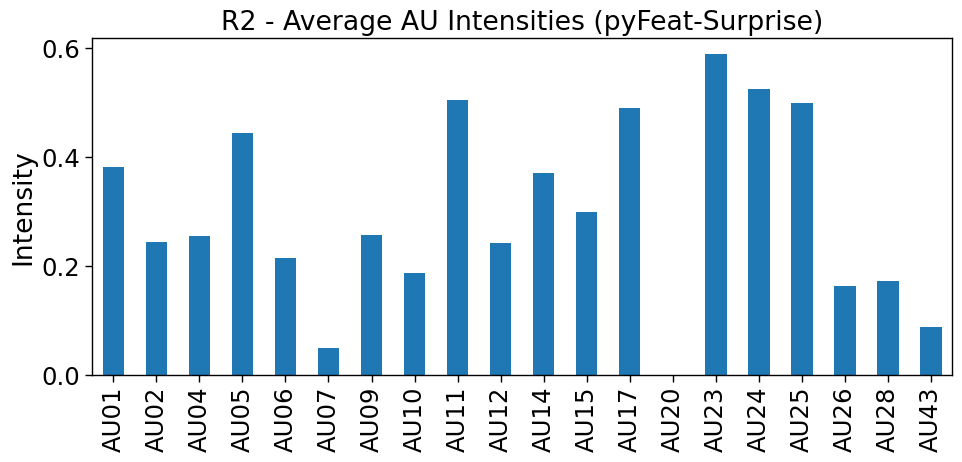

In [43]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R2 - Average AU Intensities (pyFeat-Surprise)")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident2/surprise/surprise_pyFeat_au_plot.png")
plt.show()

In [44]:
video_predictionSurprise.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.897119,0.007042,0.014907,0.002469,0.002924,0.045958,0.029581
1,0.888590,0.007783,0.014414,0.002633,0.003188,0.050563,0.032828
2,0.608478,0.014512,0.042908,0.018919,0.006920,0.233442,0.074820
3,0.100382,0.006635,0.036690,0.023414,0.009149,0.555095,0.268636
4,0.221753,0.000605,0.024208,0.030114,0.005162,0.553027,0.165132


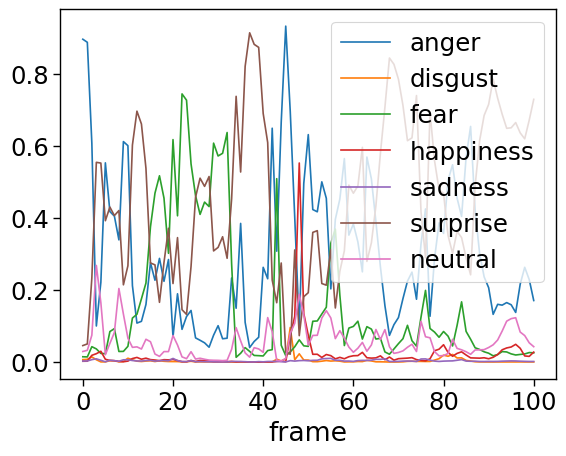

In [45]:
axes = video_predictionSurprise.emotions.plot()

## 6. Processing the 6th video: Anger

### 6.1 Load the video

In [46]:
emotionAnger_dir = os.path.join(base_path, "anger")

for filename in os.listdir(emotionAnger_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidAnger = os.path.join(emotionAnger_dir, filename)
        print(f"\n--- anger ---")
        video = cv2.VideoCapture(path_to_vidAnger)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidAnger, embed=False))


--- anger ---
FPS: 25.0


### 6.2 Process the video

In [47]:
video_predictionAnger = detector.detect_video(
    path_to_vidAnger, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/93 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 64, 64]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 64, 64]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  1%|          | 1/93 [00:01<01:52,  1.23s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:de

### save as csv

In [48]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidAnger), "pyFeat-anger.csv")
video_predictionAnger.aus.to_csv(csv_path)

### 6.3 Visualizing results

In [49]:
video_predictionAnger.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.405039,0.203433,0.829666,0.331647,0.209738,1.0,0.222679,0.012850,1.0,0.066968,0.524779,0.148479,0.567466,0.0,0.726267,0.896219,0.028745,0.033658,0.115107,0.033870
1,0.532439,0.177475,0.905496,0.309729,0.276549,0.0,0.405202,0.199551,1.0,0.091531,0.592860,0.674133,0.490233,1.0,0.762888,0.827498,0.064437,0.029987,0.149789,0.032740
2,0.451191,0.386013,0.781219,0.272106,0.393300,0.0,0.770422,0.226351,1.0,0.192061,0.661744,0.398368,0.473757,0.0,0.768803,0.934920,0.237965,0.049011,0.105040,0.091158
3,0.459863,0.392784,0.842480,0.307462,0.379317,0.0,0.701369,0.314964,0.0,0.243829,0.797287,0.279636,0.383781,0.0,0.677801,0.879920,0.106064,0.051453,0.131865,0.047460
4,0.295229,0.203820,0.725337,0.295719,0.313567,0.0,0.770401,0.919277,1.0,0.137045,0.775477,0.242384,0.504453,1.0,0.757720,0.835347,0.725904,0.096230,0.074048,0.077901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.362231,0.237692,0.229844,0.419857,0.108611,0.0,0.118302,0.007723,1.0,0.061356,0.200859,0.150655,0.478580,0.0,0.659996,0.813238,0.000931,0.047891,0.288238,0.044126
89,0.434997,0.330492,0.150518,0.573519,0.093144,0.0,0.101661,0.007464,0.0,0.036898,0.343405,0.357128,0.466565,0.0,0.651713,0.815063,0.005887,0.107390,0.144318,0.037530
90,0.343336,0.206963,0.159196,0.573983,0.088064,0.0,0.111747,0.008362,1.0,0.038611,0.242160,0.280970,0.500798,0.0,0.579434,0.753888,0.002264,0.103551,0.169787,0.016840


In [50]:
average_aus = video_predictionAnger.aus.mean()

# Display the result
print("Average AU intensities across all frames (Anger) :\n")
print(average_aus)

Average AU intensities across all frames (Anger) :

AU01    0.408160
AU02    0.331286
AU04    0.561451
AU05    0.324516
AU06    0.478165
AU07    0.338028
AU09    0.624331
AU10    0.122617
AU11    0.309859
AU12    0.437133
AU14    0.694135
AU15    0.443558
AU17    0.593700
AU20    0.140845
AU23    0.655848
AU24    0.830178
AU25    0.187983
AU26    0.067565
AU28    0.290489
AU43    0.095967
dtype: float32


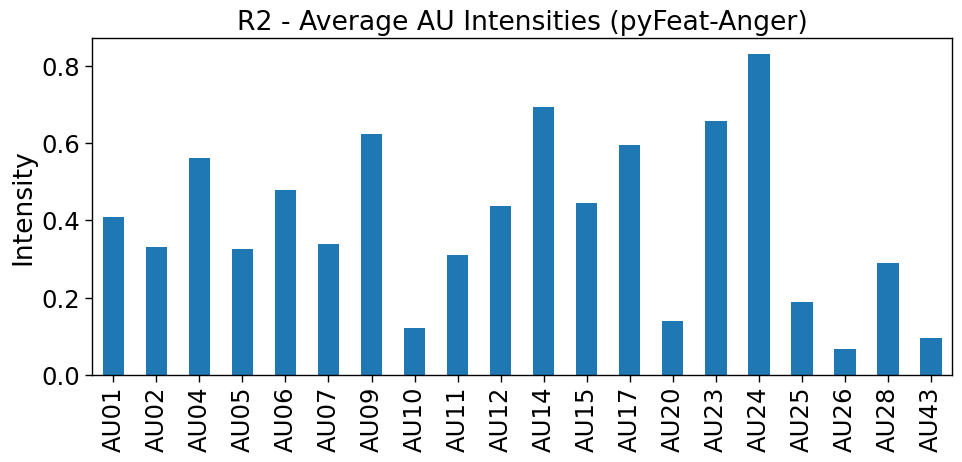

In [51]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R2 - Average AU Intensities (pyFeat-Anger)")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident2/anger/anger_pyFeat_au_plot.png")
plt.show()

In [52]:
video_predictionAnger.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.323184,0.009690,0.034680,0.052209,0.075000,0.295544,0.209693
1,0.839124,0.011229,0.018632,0.017075,0.021288,0.034681,0.057971
2,0.886953,0.001851,0.005454,0.015352,0.008368,0.047745,0.034277
3,0.856089,0.002498,0.007056,0.021053,0.004980,0.085899,0.022426
4,0.956755,0.001238,0.002333,0.008070,0.001129,0.017392,0.013083


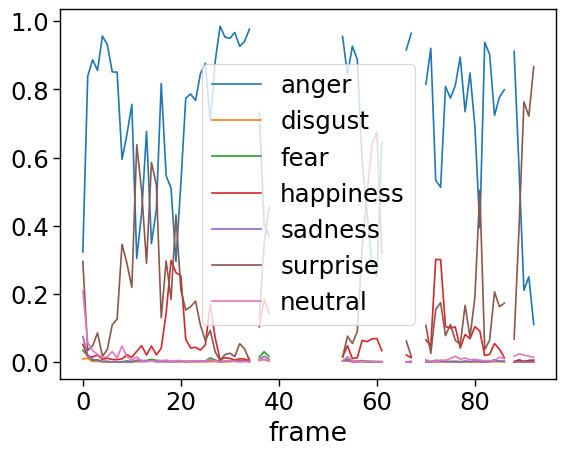

In [53]:
axes = video_predictionAnger.emotions.plot()